In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
dataset = pd.read_csv(r"D:\titanic.csv")

In [66]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [68]:
dataset = dataset.drop(columns=['Name', 'Ticket', 'Cabin'])


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [72]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [76]:
# Fill missing values in the 'Age' column with the mean
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

# Fill missing values in the 'Embarked' column with the mode
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])


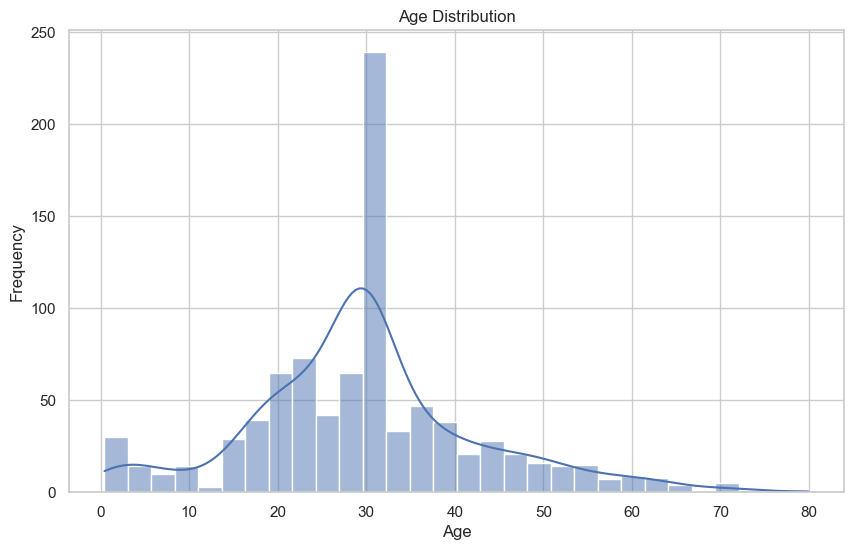

In [78]:
#Univariate Analysis-- Analyzing one variable at a time
plt.figure(figsize=(10,6))
sns.histplot(dataset['Age'],bins = 30, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

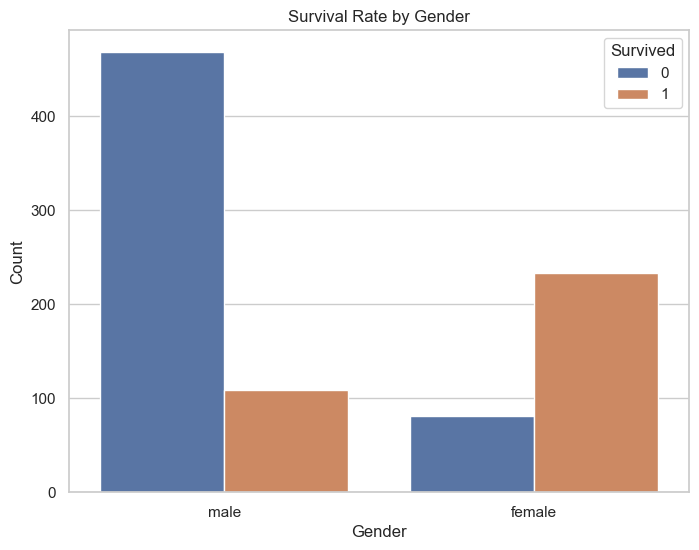

In [79]:
#Categorical Analysis--Examining the distribution of categorical variables
plt.figure(figsize = (8,6))
sns.countplot(data = dataset, x = 'Sex', hue = 'Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

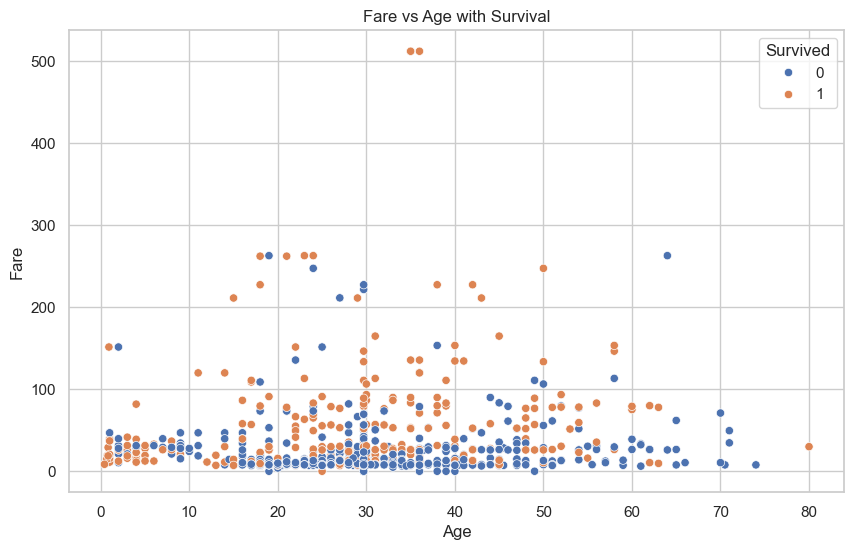

In [81]:
#Bivariate Analysis-- Analyzing relationship between variables
plt.figure(figsize = (10,6))
sns.scatterplot(data = dataset, x = 'Age', y ='Fare', hue = 'Survived')
plt.title('Fare vs Age with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

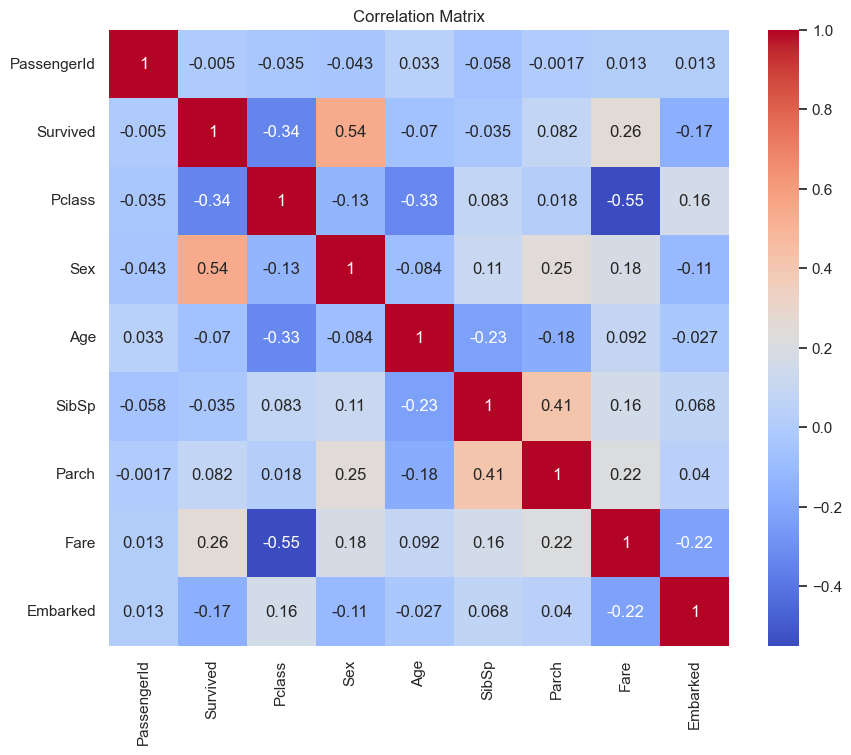

In [58]:
# 4. Correlation Matrix - Identifying correlations among numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()